# Итоговый проект курса "Библиотеки Python для Data Science"

### Подключение библиотек и скриптов

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from matplotlib import style

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from datetime import datetime

style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

### Загрузка данных

In [478]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

test_df = pd.read_csv(TEST_DATASET_PATH)
train_df = pd.read_csv(TRAIN_DATASET_PATH)

### Описание датасета

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [362]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [363]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [364]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [365]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [366]:
print(f'Строк в трейне: {train_df.shape[0]}, Столбцов в трейне: {train_df.shape[1]}')
print(f'Строк в тесте: {test_df.shape[0]}, Столбцов в тесте: {test_df.shape[1]}')

Строк в трейне: 10000, Столбцов в трейне: 20
Строк в тесте: 5000, Столбцов в тесте: 19


### Приведение типов

In [479]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
train_df['Rooms'] = train_df['Rooms'].astype('int64')
train_df['HouseFloor'] = train_df['HouseFloor'].astype('int64')

test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)
test_df['Rooms'] = test_df['Rooms'].astype('int64')
test_df['HouseFloor'] = test_df['HouseFloor'].astype('int64')

### EDA

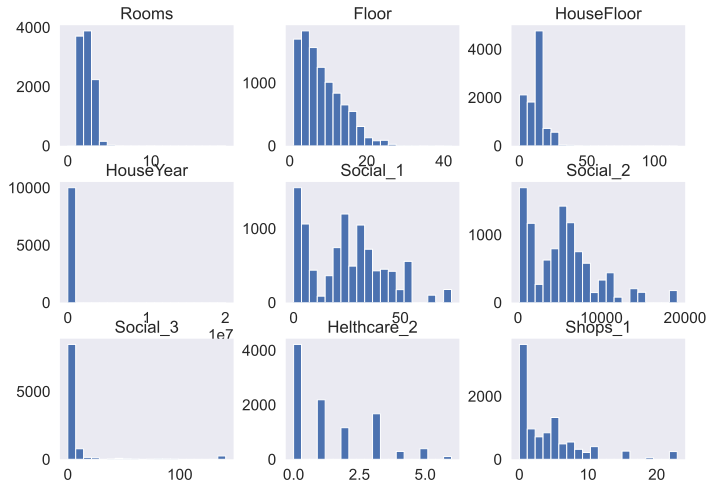

In [427]:
numerical = train_df.select_dtypes(include ='int64')

pd.DataFrame(numerical).hist(figsize = (10, 8), bins = 20, grid = False)
sns.despine(left = True, bottom = True)

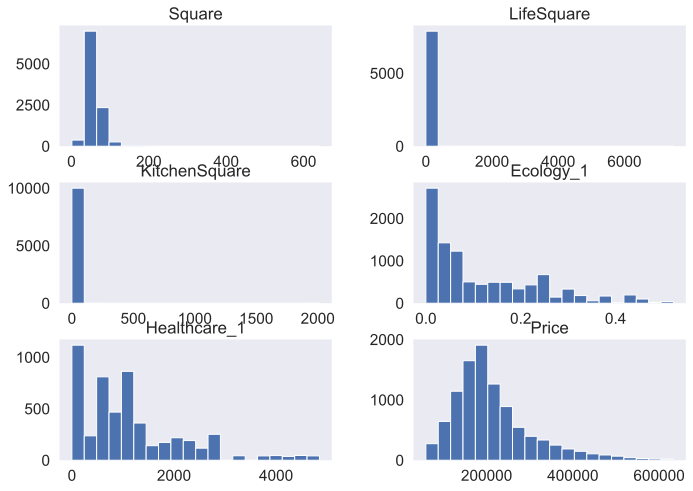

In [428]:
numerical = train_df.select_dtypes(include = 'float64')

pd.DataFrame(numerical).hist(figsize = (10, 8), bins = 20, grid = False)
sns.despine(left = True, bottom = True)

In [370]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


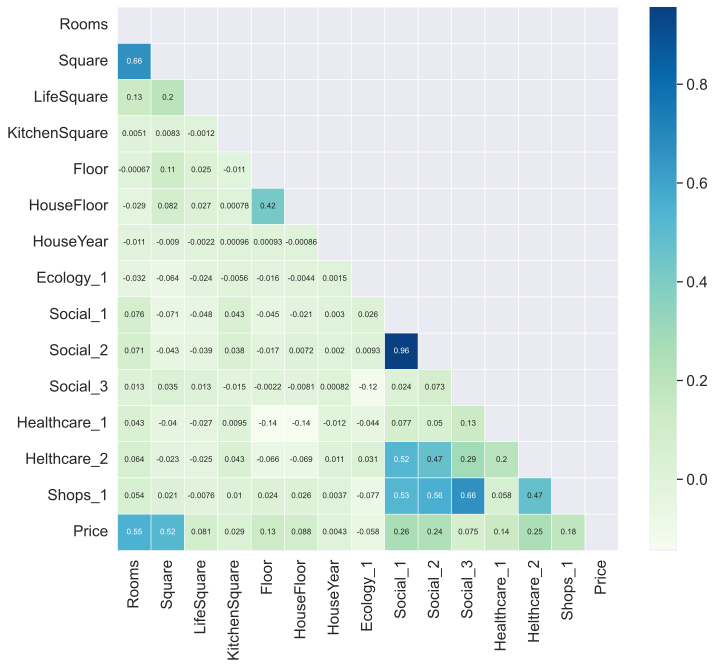

In [429]:
# Взаимосвязь признаков
correlation = pd.DataFrame(train_df.select_dtypes(include = ['int64', 'float64'])).corr()
plt.figure(figsize = (10, 10))
mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, mask = mask, annot = True, linewidths = .5, annot_kws = {"size":8}, cmap='GnBu')
plt.show()

In [430]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [373]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [374]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [375]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

# Подготовка данных

In [480]:
# Замена на бинарные значения
objects = ['Ecology_2', 'Ecology_3', 'Shops_2']

train_df[objects] = train_df[objects].replace({'A':0, 'B':1})
test_df[objects] = test_df[objects].replace({'A':0, 'B':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  int64  
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int64  
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [481]:
# Пропущенные значения
train_df.isna().sum()[train_df.isna().sum() != 0]

LifeSquare      2113
Healthcare_1    4798
dtype: int64

In [482]:
test_df.isna().sum()[test_df.isna().sum() != 0]

LifeSquare      1041
Healthcare_1    2377
dtype: int64

In [483]:
# Заполняем пропущенные значения LifeSquare разницей Square и KitchenSquare
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare'] = train_df['Square'] - train_df['KitchenSquare']
test_df.loc[test_df['LifeSquare'].isna(), 'LifeSquare'] = test_df['Square'] - test_df['KitchenSquare']

In [484]:
# Наибольшая корреляция признака Healthcare_1 с признаком Helthcare_2. Поэтому проставим среднее значение Healthcare_1
# в пропусках по каждой группе Helthcare_2.

train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] =\
    train_df.groupby(['Helthcare_2'])['Healthcare_1'].transform(lambda x: x.mean())
test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1'] =\
    train_df.groupby(['Helthcare_2'])['Healthcare_1'].transform(lambda x: x.mean())

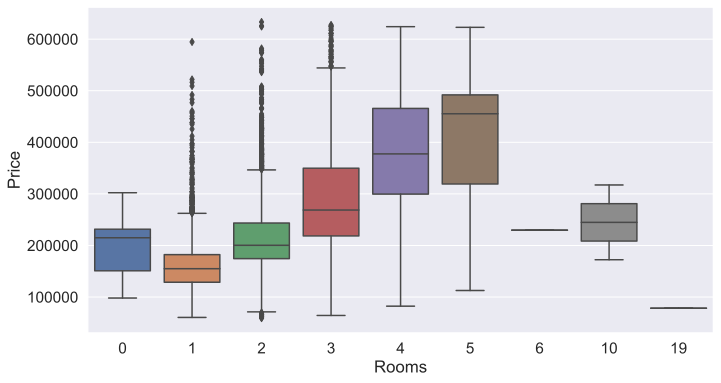

In [485]:
#Обработка выбросов

plt.figure(figsize = (10, 6))
sns.boxplot(train_df['Rooms'], train_df['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

In [486]:
# Заменим модой количество комнат равное 0 или больше 5.
train_df.loc[(train_df['Rooms'] > 5) | (train_df['Rooms'] == 0), 'Rooms'] = train_df['Rooms'].mode()[0]
test_df.loc[(test_df['Rooms'] > 5) | (test_df['Rooms'] == 0), 'Rooms'] = train_df['Rooms'].mode()[0]

In [487]:
train_df['Rooms'].value_counts()

2    3892
1    3705
3    2235
4     150
5      18
Name: Rooms, dtype: int64

In [439]:
# Обработаем выбросы площадей кухни, жилого пространства и общей площади.

In [488]:
train_df.loc[(train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.975)) | \
    (train_df['KitchenSquare'] > train_df['Square']), 'KitchenSquare'] = train_df['KitchenSquare'].median()
test_df.loc[(test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.975)) | \
    (test_df['KitchenSquare'] > test_df['Square']), 'KitchenSquare'] = train_df['KitchenSquare'].median()

In [489]:
train_df.loc[(train_df['Square'] > train_df['Square'].quantile(.975)) | \
    (train_df['Square'] < train_df['Square'].quantile(.025)), 'Square'] = train_df['Square'].median()
test_df.loc[(test_df['Square'] > test_df['Square'].quantile(.975)) | \
    (test_df['Square'] < test_df['Square'].quantile(.025)), 'Square'] = train_df['Square'].median()

In [490]:
train_df.loc[(train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.975)), 'LifeSquare'] = train_df['LifeSquare'].median()
test_df.loc[(test_df['LifeSquare'] > test_df['LifeSquare'].quantile(.975)), 'LifeSquare'] = train_df['LifeSquare'].median()

In [160]:
# Обработаем выбросы по этажам 

In [491]:
train_df.loc[(train_df['HouseFloor'] == 0) | \
    (train_df['Floor'] > train_df['HouseFloor']), 'HouseFloor'] = train_df['HouseFloor'].median()
test_df.loc[(test_df['HouseFloor'] == 0) | \
    (test_df['Floor'] > test_df['HouseFloor']), 'HouseFloor'] = train_df['HouseFloor'].median()

In [492]:
floor_outliers_train = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers_test = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index

In [493]:
train_df.loc[floor_outliers_train, 'Floor'] = \
    train_df.loc[floor_outliers_train, 'HouseFloor'].apply(lambda x: random.randint(1, x))
test_df.loc[floor_outliers_test, 'Floor'] = \
    test_df.loc[floor_outliers_test, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [494]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7721        2020
9122        2020
7955        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [495]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

### Построение новых признаков 

In [496]:
# DistrictSize
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size_test = test_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [497]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
test_df = test_df.merge(district_size_test, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,11809,27,3,52.513310,37.040829,10.0,4,10,2014,0.075424,...,1,11,3097,0,1007.781176,0,0,1,305018.871089,851
1,3013,22,1,39.832524,23.169223,8.0,7,8,1966,0.118537,...,1,30,6207,1,1183.000000,1,0,1,177734.553407,78
2,8215,1,3,78.342215,47.671972,10.0,2,17,1988,0.025609,...,1,33,5261,0,240.000000,3,1,1,282078.720850,652
3,2352,1,1,40.409907,39.409907,1.0,10,22,1977,0.007122,...,1,1,264,0,1007.781176,0,1,1,168106.007630,652
4,13866,94,2,64.285067,38.562517,9.0,16,16,1972,0.282798,...,1,33,8667,2,1007.781176,0,6,1,343995.102962,89


In [498]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [499]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)

In [501]:
# PriceRoomDistrict
train_df['PriceRoom'] = train_df['Price'] / train_df['Rooms']

In [502]:
price_district = train_df.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceRoom':'median'})\
                        .rename(columns={'PriceRoom':'PriceRoomDistrict'})

price_district

,DistrictId,PriceRoomDistrict
0,0,108490.121043
1,1,106080.898140
2,10,113675.124241
3,100,146060.096904
4,101,104499.155423
...,...,...
200,95,156039.000845
201,96,127496.377095
202,97,168870.709860
203,98,112989.528052


In [503]:
train_df = train_df.merge(price_district, on=['DistrictId'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_district, on=['DistrictId'], how='left').set_index(test_df.index)

In [504]:
train_df = train_df.drop(['PriceRoom'], axis=1)

In [505]:
train_df['RoomSquare'] = train_df['Square'] / train_df['Rooms']
test_df['RoomSquare'] = test_df['Square'] / test_df['Rooms']

In [506]:
test_df.loc[test_df['PriceRoomDistrict'].isna(), 'PriceRoomDistrict'] = test_df['PriceRoomDistrict'].median()

In [507]:
# Floor_cat
train_df.loc[train_df['Floor'] <= 5, 'Floor_cat'] = 1  
train_df.loc[(train_df['Floor'] > 5) & (train_df['Floor'] <= 17), 'Floor_cat'] = 2
train_df.loc[train_df['Floor'] > 17, 'Floor_cat'] = 3

test_df.loc[test_df['Floor'] <= 5, 'Floor_cat'] = 1  
test_df.loc[(test_df['Floor'] > 5) & (test_df['Floor'] <= 17), 'Floor_cat'] = 2
test_df.loc[test_df['Floor'] > 17, 'Floor_cat'] = 3

train_df['Floor_cat'].value_counts()

2.0    5928
1.0    3748
3.0     324
Name: Floor_cat, dtype: int64

In [508]:
labels = [1, 2, 3]
train_df['Floor_cat_qcut'] = pd.qcut(train_df['Floor'], q = 3, labels = labels)
test_df['Floor_cat_qcut'] = pd.qcut(test_df['Floor'], q = 3, labels = labels)
train_df['Floor_cat_qcut'].value_counts()

1    3748
3    3298
2    2954
Name: Floor_cat_qcut, dtype: int64

In [509]:
# HouseFloor_cat
train_df.loc[train_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
train_df.loc[(train_df['HouseFloor'] > 5) & (train_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 2
train_df.loc[train_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 3

test_df.loc[test_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
test_df.loc[(test_df['HouseFloor'] > 5) & (test_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 2
test_df.loc[test_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 3

train_df['HouseFloor_cat'].value_counts()

2.0    7759
3.0    1264
1.0     977
Name: HouseFloor_cat, dtype: int64

In [510]:
train_df[['Floor_cat', 'HouseFloor_cat']] = train_df[['Floor_cat', 'HouseFloor_cat']].astype(int)
test_df[['Floor_cat', 'HouseFloor_cat']] = test_df[['Floor_cat', 'HouseFloor_cat']].astype(int)

# Отбор признаков

In [462]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'IsDistrictLarge',
 'PriceRoomDistrict',
 'RoomSquare',
 'Floor_cat',
 'Floor_cat_qcut',
 'HouseFloor_cat']

In [463]:
target_names = ['Price']
feature_names = ['DistrictId',
                 'Rooms',
                 'Square',
                 'LifeSquare',
                 'KitchenSquare',
                 'Floor',
                 'HouseFloor',
                 'HouseYear',
                 'Ecology_1',
                 'Ecology_2',
                 'Ecology_3',
                 #'Price',
                 'Social_1',
                 'Social_2',
                 'Social_3',
                 'Healthcare_1',
                 'Helthcare_2',
                 'Shops_1',
                 'Shops_2',
                 'DistrictSize',
                 'IsDistrictLarge',
                 'PriceRoomDistrict',
                 'RoomSquare',
                 'Floor_cat',
                 'Floor_cat_qcut',
                 'HouseFloor_cat']

# Разбиение на train и test 

In [464]:
X = train_df[feature_names]
y = train_df[target_names]

In [465]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

# Построение модели

In [466]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')

In [467]:
rf_model_best = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
rf_model_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=5, random_state=56)

In [468]:
y_train_preds = rf_model_best.predict(X_train)
y_valid_preds = rf_model_best.predict(X_valid)

print("Train R2:\t" + str(round(r2(y_train, y_train_preds), 3)))
print("Test R2:\t" + str(round(r2(y_valid, y_valid_preds), 3)))

Train R2:	0.937
Test R2:	0.745


# Прогнозирование на тестовом датасете 

In [470]:
predictions = rf_model_best.predict(test_df[feature_names])
predictions

array([157171.6534078 , 135412.06754765, 158634.28196559, ...,
       149445.08744391, 190901.51602844, 256245.84694994])

In [471]:
preds = pd.DataFrame()
preds['Id'] = test_df.index
preds['Price'] = predictions
preds.head()

,Id,Price
0,0,157171.653408
1,1,135412.067548
2,2,158634.281966
3,3,185649.881536
4,4,210684.675890


In [472]:
preds.to_csv('predictions_1.csv', index=False)

# Light auto ML

In [347]:
!pip install lightautoml

  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730984 sha256=090ec10acc5266f872e3ec9b16bfcecacbdda87e192d3f1080cffc6e14f1d541
  Stored in directory: c:\users\cluster\appdata\local\pip\cache\wheels\33\3d\82\4579e9cca41ff991140b2e050bc6df3a38292f26e4fa06b15d
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=7609 sha256=f990a27047ac6899a62764697b02e212f5f5ac112224531264c8d7a95a536d63
  Stored in directory: c:\users\cluster\appdata\local\pip\cache\wheels\b9\56\a2\f610a5e8a635d74d27c9971d6099b2521d2155169ff2d99b89
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=445fa538ba8db56c906f7f859762ebfcef06cf960ce5d79997c422ffbbcd59e2
  Stored in directory: c:\users\cluster\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pymeeus json2html pyperclip


In [407]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.tasks.common_metric import mean_quantile_error, rmsle, r2_score

In [408]:
TASK = Task('reg', loss='mse', metric=rmsle, greater_is_better=False)
TIMEOUT = 300000
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TARGET_NAME = 'Price'
TEST_SIZE=0.2

In [409]:
roles = {'target': TARGET_NAME, 'drop': ['Id']}

In [410]:
automl_model = TabularAutoML(task=TASK,
                            timeout=TIMEOUT,
                            cpu_limit = N_THREADS,
                            gpu_ids='all',
                            reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                            general_params={'use_algos': [ ['lgb_tuned', 'cb_tuned', 'cb'], ['lgb_tuned', 'cb'] ]},
                            tuning_params={'max_tuning_iter': 10},
                      )

In [420]:
oof_pred = automl_model.fit_predict(X_train, roles = roles)

In [421]:
test_df['Price'] = automl_model.predict(test_df).data

In [422]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,DistrictSize,IsDistrictLarge,PriceRoomDistrict,RoomSquare,Floor_cat,Floor_cat_qcut,HouseFloor_cat,Price
0,4567,44,1,36.847630,19.094182,5.0,5,9,1970,0.036122,...,1,1,46,0,125925.656002,36.847630,1,1,2,162853.187500
1,5925,62,1,42.493907,42.568133,10.0,7,17,2017,0.072158,...,0,0,122,1,102579.536659,42.493907,2,2,2,139569.906250
2,960,27,2,59.463678,50.463678,9.0,19,19,1977,0.211401,...,1,1,391,1,94738.780105,29.731839,3,3,3,149971.671875
3,3848,23,3,49.646030,33.893825,6.0,2,2,1965,0.014073,...,0,1,264,1,76232.424372,16.548677,1,1,1,139020.031250
4,746,74,1,53.837056,52.837056,1.0,8,17,1977,0.309479,...,6,1,61,0,127646.564953,53.837056,2,2,2,188659.593750


In [423]:
test_df.to_csv('submission_LAMA.csv', columns=['Id', 'Price'], index=False)